# Homework Three - Simple Linear Regression and Gradient Descent
## Objective

As a result of completing this exercise you should be able to:

- Review Partial Derivatives
- Understand the theory for Simple Linear Regression
- Understand the concept of Gradient Descent
- Implement Gradient Descent algorithm for Simple Linear Regression
- Build a Simple Linear Regression model use scikit learn methods
- Build a Simple Linear Regression model using Gradient Descent(Bonus) 

## Instructions

### Sections
This homework includes two sections. In the first section, you will do exercise on math and theory behind linear regression and gradient descent. In the second section, you will implement functions for gradient decesnt and simple linear regression in Python. 

### Submission
The assignment should be submitted on Canvas. You will submit a single zip file.  

- Put all your work into a folder, which should have the 
    - "ISAT341_hw3.ipynb", which includes your solutions for the first section and your codes for the second section
    - a subfolder called "datasets",which contains the test data 'calcofi.csv'
    - a subfolder called "images", which contains the images for Q9 and Q10 and (if you use photos or images to show your work) all the images you displayed in the Jupyter Notebook
- Compress your homework folder into a zip file
- Name you zip file as "hw3_$\lt$your JMU eid$\gt$". For example, Dr. Yang's eid is yang4cx, then the submission would be "hw3_yang4cx.zip"

## Section I: Concept and Theory

### Partial Derivatives
Given the following functions of variables (u, v, w), what are the patial deriviates (Q1 to Q6)? 

$$ f(u,v) = 5u^2v^3 + 2u^2 + 7v $$
$$ g(u,v,w) = 10xu^2+ 2xv + yuvw^5 + 3u^2w $$
$$ h(u,v) =  \frac{1}{2} \sum_{i=1}^{m} (x^{(i)}u+v-y^{(i)})^2$$


Please view other variables (x,y) as constants
 
In a machine learning alogrithm
 
 - The variables u, v, w are like the parameters or weight, i.e.,$\mathbf{\theta}$, which change during the learning process to get the minimum cost
 - Those other variable x and y can be view as the training data, which won't chnage during the model learning process

Q1. $\frac{\partial}{\partial u}f(u,v) = 10uv^3+4u$

Q2. $\frac{\partial}{\partial v}f(u,v) =15u^2v^2+7$

Q3. $\frac{\partial}{\partial w}g(u,v,w) = 5yuvw^4+3u^2 $

Q4. $\frac{\partial}{\partial u}g(u,v,w) = 20xu+yvw^5+6uw $

Q5. $\frac{\partial}{\partial u}h(u,v) =\frac{1}{2} \sum_{i=1}^{m} (x^{i})^2$

Q6. $\frac{\partial}{\partial v}h(u,v) = \frac {1}{2}\sum (x^i+y^i)$

### Gradient with Partial Derivatives
Parital derivatives of a function can help us find the gradient, the slope, with respect to given variable. When the gradient or slope equals to zero, it reaches to the local minimum or maximum of the function.

Given that the general hypothesis function and cost function for simple linear regresion are

- Hypothesis for a simple linear regression with only slope:
$$
h_\theta(x)= \theta_1x
$$
- Cost function for a simple linear regression:
$$
J(\theta) = \frac{1}{2} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2
$$

We have training data with two samples:

| x  | y |
| -- |-- |
| 1 | 3 |
| -3 | -4 |


Q7. Find the value of $\theta_1$ that minimizes the cost function (the $J(\theta)$ function above)
    
   - Substitute the values from the training data into
the cost function, 
   - Set the derivative equal to zero
   - Solve the equation and find the value for $\theta_1$
   
   Show your work.

- Substitute answer= $$5\theta^2-15 \theta+25$$
- Set derivative to zero= $$\theta=1.5$$
- Hypothesis= $$h_\theta(x)=\theta_1x_1=1.5x$$

Q8. Find the general expression for $\theta_1$
   
   - Leave the x(i) and y(i) variables as constanct
   - Take the partial derivatives of the given cost function with respect to $\theta_1$
   - Set those partail derviative equal to zero
   - Find the general expression of $\theta_1$ in terms of the training data by solving the above equation (partial derivative equals to zero)
   - Solve for the value of $\theta_1$ that minimizes the cost function (the $J(\theta)$ function above) by plugging the values of training data

 
Show your work.

- leave partial= $$\theta x^2-x_2y_1+\theta x_2^2-x_2y_2$$
- general expression = $$\theta = \sqrt (\frac{x_1y_1+x_2y_2}{x_1+x_2})$$
- solve= $$ \theta = 1.5$$

Note: the value you found in Q7 and Q8 should be the same.

### Intuition of Gradient with Contour Plot
A coutor plot shows the f(x,y) value with given x and y on a 2D plot. When the slope (gradient) with regard of x is positive at given data (x,y), then you will see the f(x,y) is smaller than f(x+1, y) otherwise, f(x,y) is largr than f(x+1, y). 

Note: only consider one axis at a time, and keep the other variable as constant, just as doing the partial derivatives


For example, with below contour plot (which shows the value of g(u,v)), we can see g(2,-2)= 12 and g(3, -2) $\approx$ 20. Then, $\frac{\partial}{\partial{u}}g(2,-2)$ is positive.

Using the same contour plot to the partial derivatives in Q9-Q10 is positive, negative, or zero. (You don't need to know the forumla of the function to answer the questions)

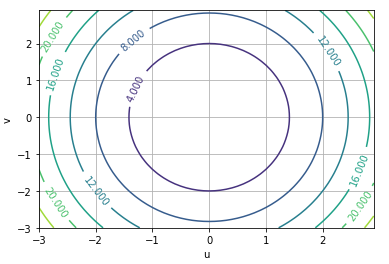

In [4]:
from IPython.display import Image
Image('./images/contour.png')

Q9. Is $\frac{\partial}{\partial{u}}g(-2,0)$ positive, negative, or zero?

Negative

Q10. Is $\frac{\partial}{\partial{v}}g(-2,0)$ positive, negative, or zero?

Negative

## Section II: Programming

### Gradient Descent for Simple Linear Regression

Please implement a gradient descent algorithm for simple linear regression. A simple linear regression uses a linear function to describe the relationship between two variables. You can predict your target value y based on one feature x and two parameters, $\theta_0$ and $\theta_1$

$$ y = h_\theta(x) $$

#### Equations for the functions in a simple linear regression

Q11. What is the genereal equation for hypothesis of a simple linear regression? 

$$
y \approx \hat{y} = h_\theta(x)= \theta_0 + \theta_1x_1
$$

Q12. What is the cost function we learned for cost function of a simple linear regression?

$$
J(\theta) = \frac{1}{2} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2
$$
$$
= \frac{1}{2} (h_\theta(x^{(1)})-y^{(1)})^2
$$

#### Implement those functions using Python below:
Q13 to Q15

In [10]:
# install pacakges 
import matplotlib.pyplot as plt 
import numpy as np 

# define your hypothesis
# it is necessary as you will use the h(x) in your gradient descent algo
# in the function, remeber to include arguments needed: e.g., h(x,.....)
def h(theta0, theta1, x):
    # type your hypothesis equation
    hyp=theta0+theta1*x
    
    #return the calcuation value
    return hyp

In [11]:
# define your cost function, if you want to print out the cost
# in the function, remeber to include arguments needed: e.g., J(theta,.....)
def J(theta0, theta1, x, y):
    # type your cost function equation
    J=0.5*(h(theta0, theta1,x)-y)^2
    
    #return the calcuation value
    return cost

In [29]:
# Define a function to calcualte cost when you have more than one sample
# You may bulid the function for muliple samples based on J function above
# or build a new one
# Note a loop may be needed to sum up all the costs from all the samples
def J_m(theta0,theta1, x, y):
    # type your cost function equation
    sum=0
    for i in range(2):
        sum ==J(theta0, theta1, x[i], y[i])
#return the calcuation value
    return J_m

#### Implement Gradient Descent algo. for a simple linear regression with one instance (one sample)

Q16. 

Please set the training data as x = 10, y =3.

In [30]:
##preprocessing
#intialize parameters values x and y 
theta_0_gd=(10)
theta_1_gd=(3)

# size it 
alpha=0.4

#gradient descent 
for i in range():
    #display cost function 
    J=0.5*(h(theta0, theta1,x)-y)^2
    print("")




In [14]:
# learning
# initialization


# gradient descent algorithm: interatively taking steps in the steepest direction
# you may use loops to do the iterations

    # find new parameters and weights
    




Use your model with new feature values to predict new label. For example, x = 5.

In [15]:
# prediction
# making prediction using the hypothesis with the parameter you found from the gradient descent


#### Then, implement Gradient Descent algo. for a simple linear regression with mutliple instances (mutiple samples)

Q 17. 

Please set the training data $${(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)})} = {(10,3),(1,5)}$$
you may use arrays or np.array to set your training data

In [16]:
# preprocessing
# set the traing data for samples: feature x and target value y


In [17]:
# learning
# initialization



# gradient descent algorithm: interatively taking steps in the steepest direction
# you may use loops to do the iterations

    # find new parameters and weights
   
        

Use your model with new feature values to predict new label. For example, x = 5.

In [10]:
# predicition
# making prediction using the hypothesis with the parameter you found from the gradient descent


### Build Simple Linear Regression Model with `scikit-learn` Package for Real-world Data
Q18.

In this question, please build a simple linear regression model using scikit-learn package to predict the salinity (target value) based on the water temperature (one feature) with the external data, "calcofi.csv". The external data (i.e., "calcofi.csv") includes 880 samples off the coast of California. 

*Please include the preprocessing, learning, and prediction steps. In the prediction step, please select your own value for the water temperature.* 
 

About the data set:

The dataset in "calcofi.csv" is a subset and simplified version of CalCOFI data. CalCOFI data contain time series of oceanographic and larval fish data since 1949 from 50,000 sampling stations.


| variable name | description  |
| ------------- | ------------ |
| Cst_Cnt | Auto-numbered Cast Count - all casts consecutively numbered. 1 is first station done |
| Btl_Cnt | Auto-numbered Bottle count- all bottles ever sampled, consecutively numbered |
| Depthm | Depth in meters |
| T_degC | Water temperature in degree Celsius |
| Salnty | Salinity in g of salt per kg of water (g/kg) |

Data source:
The data are from Kaggle and more details as well as data description can be found at https://www.kaggle.com/sohier/calcofi.



In [1]:
##preprocessing
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#load the data 
calcofi = pd.read_csv("./datasets/calcofi.csv")

In [12]:
# check the shape of the DataFrame: rows and columns
print(calcofi.shape)

# check the dimension of the DataFrame
print(calcofi.ndim)

(880, 5)
2


In [2]:
##exploring data 
# check the first few, five by default, lines of the data
calcofi.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty
0,1,1,0,10.50,33.440
1,1,2,8,10.46,33.440
2,1,3,10,10.46,33.437
3,1,4,19,10.45,33.420
4,1,5,20,10.45,33.421


In [3]:
##exploring data
# check the last few, five by default, lines of the data
calcofi.tail()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty
875,30,905,700,5.25,34.328
876,30,906,800,4.83,34.373
877,30,907,900,4.42,34.422
878,30,908,917,4.35,34.430
879,30,912,1263,3.36,34.650


In [15]:
##assign values and features 
# get the proper column using the index and assign the column to the proper variable
X = calcofi["T_degC"].values
y = calcofi["Salnty"].values

In [16]:
# check the shape and dimension of the data
print(X.shape)
print(y.shape)

(880,)
(880,)


In [17]:
# reshape the features to a proper format (vector or matrix) for the learning model 
X = X.reshape(-1,1)
print(X.shape)

(880, 1)


In [18]:
#split training 
# load necessary package and methods
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [19]:
X_train.shape

(704, 1)

In [20]:
# learning
#import packages 
from sklearn.linear_model import LinearRegression

# build a linear regression model
# set the regression
slr_model = LinearRegression()

# fit the model with training set
slr_model.fit(X_train,y_train)

LinearRegression()

In [49]:
#show the result of learning: information about the model
print('intercept:', slr_model.intercept_)
print('slope:', slr_model.coef_)

print('score:', slr_model.score(X_train,y_train))

intercept: 34.823425108800436
slope: [-0.1387568]
score: 0.7366024097840789


In [50]:
# prediction
X_new = [[6]]
print(slr_model.predict(X_new))

[33.99088431]


### [Bonus] Build Simple Linear Regression Model with Gradient Descent for Real-world Data

Q19.

Please use the same data set (i.e., "calcofi.csv") as what you use above for Q18 to train a simple linear regression with gradient descent functions you defined. Include the preprocessing, learning, and prediction steps. *Answer the questions after you build the model.*

*In the prediction step, please use the same value of the water temperature you select in Q18. *

In [51]:
## preprocessing
# import packages for future use in this notebook 
# please import the packages you plan to use, if prefered
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#load the data 
calcofi = pd.read_csv("./datasets/calcofi.csv")

In [53]:
# check the shape of the DataFrame: rows and columns
print(calcofi.shape)

# check the dimension of the DataFrame
print(calcofi.ndim)

(880, 5)
2


In [28]:
##exploring data 
# check the first few, five by default, lines of the data
calcofi.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty
0,1,1,0,10.50,33.440
1,1,2,8,10.46,33.440
2,1,3,10,10.46,33.437
3,1,4,19,10.45,33.420
4,1,5,20,10.45,33.421


In [29]:
##exploring data
# check the last few, five by default, lines of the data
calcofi.tail()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty
875,30,905,700,5.25,34.328
876,30,906,800,4.83,34.373
877,30,907,900,4.42,34.422
878,30,908,917,4.35,34.430
879,30,912,1263,3.36,34.650


In [30]:
##assign values and features 
# get the proper column using the index and assign the column to the proper variable
X = calcofi[""].values
y = calcofi["price_usd1000"].values

KeyError: ''

In [ ]:
# learning


In [ ]:
# prediction


Questions:
- Compare the two models (the one with gradience desent algorithm vs. the one with scikit-learn), do they give you similar models or not?
- How?

< your solution here >